**Importación de librerías**

In [29]:
import pandas as pd

import numpy as np

In [21]:
import matplotlib.pyplot as plt

import seaborn as sns

import plotly.graph_objects as go

**Importación de datos**

In [6]:
df = pd.read_csv("../Input/athlete_events.csv")  

In [8]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


**Diferencia de medallas en los juegos de verano e invierno**

In [15]:
dfGames = df[["Year","Season","Medal"]]
dfGames = dfGames.groupby(["Year", "Season"]).agg({"Medal":"count"}).reset_index()
dfGames.head()

,Year,Season,Medal
0,1896,Summer,143
1,1900,Summer,604
2,1904,Summer,486
3,1906,Summer,458
4,1908,Summer,831


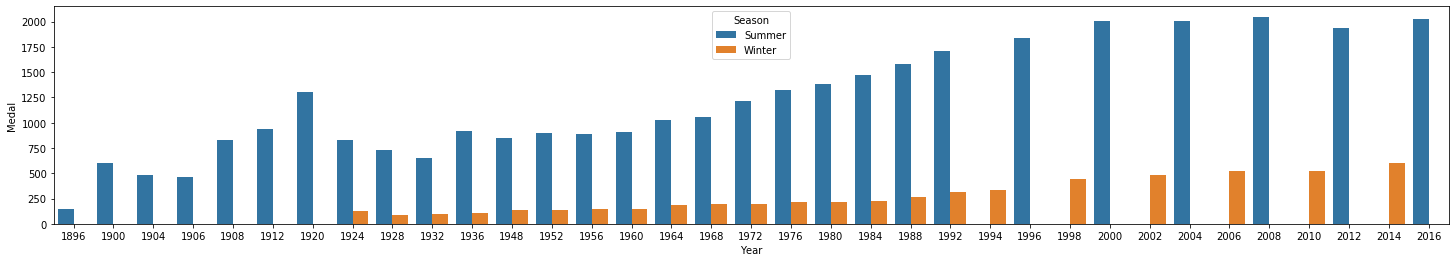

In [16]:
fig_dims = (25, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Year", y="Medal", hue="Season",ax=ax,data=dfGames)

In [26]:
df = pd.read_csv("../Input/athlete_events.csv")  

df = pd.get_dummies(df,columns=["Medal"])
df = pd.DataFrame(df[["Name",'Medal_Gold','Medal_Silver', 'Medal_Bronze']].groupby("Name").agg({'Medal_Gold':"sum",'Medal_Silver':"sum", 'Medal_Bronze':"sum"}))
df['Medals'] = df.loc[:, 'Medal_Gold':'Medal_Bronze'].sum(1)
df = df.sort_values(by=["Medals"], ascending = False).iloc[:10].reset_index()

Athletes=df["Name"]
fig = go.Figure(data=[
    go.Bar(name='Gold_Medal', x=Athletes, y=df["Medal_Gold"]),
    go.Bar(name='Silver_Medal', x=Athletes, y=df["Medal_Silver"]),
    go.Bar(name='Bronze_Medal', x=Athletes, y=df["Medal_Bronze"])
])

fig.update_layout(barmode='group')
fig.show()


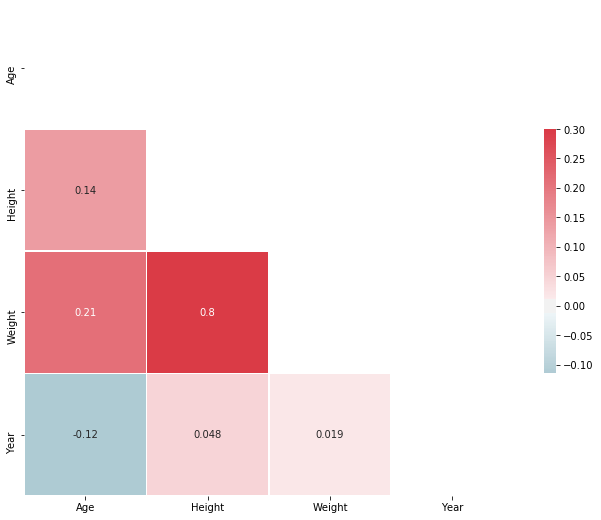

In [30]:
df = pd.read_csv("../Input/athlete_events.csv") 

df.drop(columns="ID", inplace=True)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)